In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Read data from each CSV file
file_paths = ['/Users/k20098771/Data/Figures/Figure_S6-7/6z0g_side_chainA_contact_map_01.csv', 
              '/Users/k20098771/Data/Figures/Figure_S6-7/6z0g_side_chainB_contact_map_01.csv',
              '/Users/k20098771/Data/Figures/Figure_S6-7/6z0i_side_chainA_contact_map_01.csv',
              '/Users/k20098771/Data/Figures/Figure_S6-7/6z0i_side_chainB_contact_map_01.csv',
              '/Users/k20098771/Data/Figures/Figure_S6-7/AF_side_chainA_contact_map_01.csv',
              '/Users/k20098771/Data/Figures/Figure_S6-7/AF_side_chainB_contact_map_01.csv']

dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Initialize a dictionary to count the occurrences of each row
row_counts = {}

# Loop through each DataFrame and count row occurrences
for df in dfs:
    for _, row in df.iterrows():
        row_tuple = tuple(row[['TREM2', 'DAP12']])
        if row_tuple in row_counts:
            row_counts[row_tuple] += 1
        else:
            row_counts[row_tuple] = 1

# Create a new DataFrame for rows occurring more than twice
new_rows = [row for row, count in row_counts.items() if count >= 3]
new_df = pd.DataFrame(new_rows, columns=['TREM2', 'DAP12'])

# Save the new DataFrame to a CSV file
new_df.to_csv('/Users/k20098771/Data/Figures/output_count_equal_over_3.csv', index=False)
#print("New CSV file 'output.csv' created with rows where more than two figures are the same.")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
new_df

,TREM2,DAP12
0,10,9
1,26,16
2,19,12
3,26,20
4,34,27
5,34,20
6,34,23
7,34,24
8,38,28


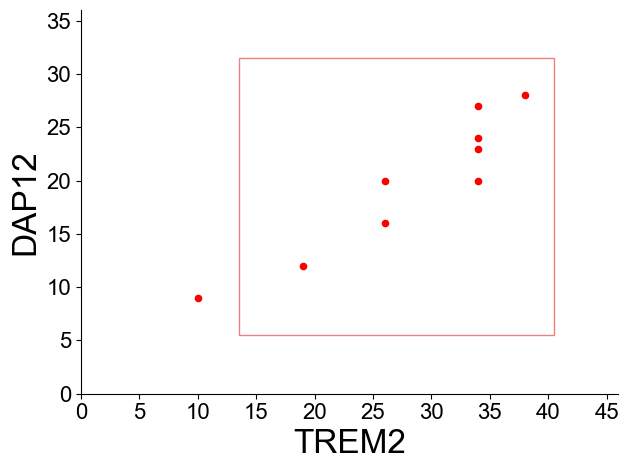

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Assuming you already have 'new_df' as your DataFrame
df = pd.DataFrame({'DAP12': new_df['DAP12']})
df['TREM2'] = new_df['TREM2']

# Plotting the DataFrame
ax = df.plot(x='TREM2', y='DAP12', kind='scatter', color='red')
ax.set_xlabel('TREM2', fontsize=24, fontname='Arial')
ax.set_ylabel('DAP12', fontsize=24, fontname='Arial')

# Add the rectangle
rect_2 = patches.Rectangle((13.5, 5.5), width=27, height=26, fill=False, edgecolor='lightcoral')
ax.add_patch(rect_2)

# Adjusting the x-axis and y-axis ticks
x_ticks = range(0, 47, 5)
y_ticks = range(0, 37, 5)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)

plt.xlim([0, 46])
plt.ylim([0, 36])

# Changing the font name of x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xticks(), fontsize=16, fontname='Arial')
ax.set_yticklabels(ax.get_yticks(), fontsize=16, fontname='Arial')

# Remove right and top spines
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.tight_layout()

# Saving the plot as an image file
plt.savefig("/Users/k20098771/Data/Figures/CGtoAA_contact_maps_merge_great_or_equal_3.eps", dpi=800, format='eps')

# Show the plot
plt.show()


In [4]:
new_df.shape


(80, 2)

In [5]:
import pandas as pd

# Assuming you already have 'new_df' as your DataFrame
df = new_df

# Define the filtering conditions
condition_trem2 = (df['TREM2'] >= 14) & (df['TREM2'] <= 40)
condition_dap12 = (df['DAP12'] >= 6) & (df['DAP12'] <= 31)

# Apply the conditions to filter the DataFrame
filtered_df = df[condition_trem2 & condition_dap12]

# Save the filtered data to a new CSV file
#filtered_df.to_csv('/Users/k20098771/Data/Figures/20230917_filtered_data_3.csv', index=False)

print("Filtered data saved to 'filtered_data.csv'.")

filtered_df

Filtered data saved to 'filtered_data.csv'.


,TREM2,DAP12
5,22,9
6,22,12
7,22,13
8,25,13
9,26,13
10,26,16
11,29,17
12,30,17
13,33,17
14,33,21
